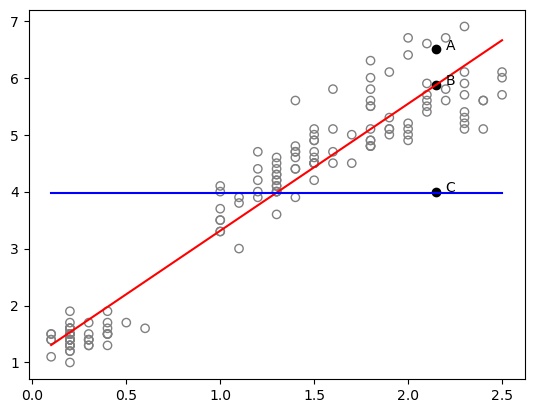

1882.4523676480271 1.1102230246251565e-16
                            OLS Regression Results                            
Dep. Variable:           Petal_Length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           4.68e-86
Time:                        21:54:32   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercep

1.429551519703141

In [102]:
#
# ----------------------------------------------------------------
#                         단순 선형 회귀
# ----------------------------------------------------------------
#
# 선형회귀는 반응변수(y) 관찰값, 오차가 정규분포를 따른다는 가정하에 
# Y = B dot X + E 의 직선의 방정식 형태의 모델로 적합하여 B(회귀계수)를 추정 
# 
# 모델이 데이터에 잘 적합되었는지(모델 유의성)는 모델이 데이터의 변동성 중
# 오류가 없이 얼만큼을 설명해주고 있는지를 통계량으로 한 F 검정을 통해 실행
#
# 오차(잔차)가 N(0, σ²) 을 따른다는 가정이 있으니 잔차의 정규성, 등분산성 체크
# 
# (1) 모델 구조 :  yi = β0 + β1 * xi + ei
# (2) 모델 가정 
#   - 반응 변수의 관찰값은 y ~ N(Xβ, σ²) 모델에서 발생됨을 가정   
#   - 잡음의 분포는 N(0, σ²) 를 따른다고 가정
# (3) 회귀 계수 추정
#   - β = ( X_T · X )^-1 · X_T · y            * p x n · n x p · p x n · n x 1  →  p x 1  
# (4) 모델 유의성
#   - H0 는 B 는 모두 0 임 , Ha 는 B 중 하나라도 0 이 아님 
#   - F 통계량 = (설명된 변동성 / 계수 개수 ) / (설명되지 않은 변동성 / 표본 개수 - 계수 개수 - 1) 
#     - F 통계량 ~ F (계수 개수, 표본 개수 - 계수 개수 - 1)  * 주의! 절편은 계수 개수에 포함되지 않음  WHY???
#     - 설명된 변동성은 SSR , 설명되지 않은 변동성은 SSE 를 의미함
#   - ANOVA 로 검정 가능
# (5) 모델 설명력
#   - R² : 모델의 전체 변동성 比 설명된 변동성의 비율 = SSR / SST = 1 - SSE / SST  
#   - R² 은 회귀 계수가 많아지기만 해도 커지는 경향이 있어 회귀 계수에 대한 패널티를 준 것이 R²adjusted 임
#   - R² adjusted = 1 - {SSE / (n - p - 1)} / {SST / (n - 1)}
#   - R² 이 높다는 것은 설명력이 좋다는 것! 모델이 데이터에 잘 적합되었다는 것이 아님!
# (6) 잔차의 분산 추정
#   - MSE = SSE / (n - p - 1) 
# (7) 잔차의 정규성, 등분산성
#   - QQ Plot , Shapiro-Wilk 검정을 통해 정규성 체크
#   - 등분산성이란 독립변수들의 값에 관계없이 잔차의 크기가 일정하다는 것
#     이는 독립변수와 잔차는 독립성을 갖는다는 의미
#     . 잔차 제곱 / 잔차 분산 추정 ~ 카이제곱(p) 분포를 따름
#     → 이는 Beush-Pagan 검정으로 실행 * H0 : 잔차의 분산이 일정하다
# (8) 잔차의 독립성
#   - 잔차의 독립성은 X 들에 따른 잔차의 산점도로 시각적 확인
#   - Dourbin Waton 검증을 통해 잔차간 자기 상관성이 있는지 검정
#     . H0 : 잔차들 간 상관성이 있다. Ha: 잔차들간 상관성 없다
#  
# * [참고] Numpy 행렬 연산 Tip 
#   - shape 은 행 x 열. e.g., np.array((2,3)), np.ones((2,3)) , np.full((2,3), 10)
#   - reshape, esp., column vector 로 만들기 위해서는 df[col].values.reshape(-1,1), 여기서 -1 은 행의 수를 df 크기에 맞춘다는 것
#   - np.dot , np.linalg.inv
#   - column vector 를 덧붙이기 위해서는 np.concatenate(a, b, axis = 1)
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as sp

df = pd.read_csv('./data/iris.csv')
df = df.rename(columns= lambda x: x.replace('.','_'))

x = df['Petal_Width'].values.reshape(-1, 1)
y = df['Petal_Length'].values.reshape(-1, 1)

#
# (1) 선형 대수를 통한 회귀 계수 추정
#
X = np.concatenate([np.ones((df.shape[0], 1)), x], axis=1)
XT = np.transpose(X)
XT_X = np.dot(XT, X)
beta = np.dot(np.dot(np.linalg.inv(XT_X),XT),y)       # intercept : 1.08355803 , beta1 = 2.2299405

#
# (2) 적합 모델의 시각화 : Red line 이 회귀식 , Blue line 은 y 의 평균, dot 은 데이터
#  - SST (Sum of Square Total)    : 총 변동량            , A ~ C 차이 제곱합
#  - SSE (Sum of Square Error)    : 오차로 발생하는 변동량, A ~ B 차이 제곱합
#  - SSR (Sum of Square Redisual) : 모델이 설명하는 변동량, B ~ C 차이 제곱합 ← 평균 추정 대비 모델이 얼마나 설명력을 향상시켰는가?
#  - SST = SSE + SSR
x1 = np.linspace(df['Petal_Width'].min(), df['Petal_Width'].max(), 100)
y1 = beta[0] + beta[1] * x1 
plt.plot(x1, y1, color='red')
plt.scatter(x, y, marker = 'o',  facecolors = 'none', edgecolors = 'grey')
plt.plot(x1, np.full(100, np.mean(y1)), color='blue')
plt.scatter(2.15, 6.5, marker='o', color='black')
plt.text(2.2, 6.5,"A")
plt.scatter(2.15, 2.15 * beta[1] + beta[0], marker='o', color='black')
plt.text(2.2, 2.15 * beta[1] + beta[0],"B")
plt.scatter(2.15, 4, marker='o', color='black')
plt.text(2.2, 4,"C")
plt.show()

y_hat = beta[0] + beta[1] * x
y_bar = np.mean(y)

#
# (3) 모델 유의성 검정 - F 검정
# - H0 : 모든 회귀계수는 0 이다 ,  HA : 회귀계수 중 적어도 하나는 0 이 아니다

# A. F 분포를 통해 직접 수행하는 방법 
n = df.shape[0]
p = 1
SSR = np.sum((y_bar - y_hat)**2)
SSE = np.sum((y - y_hat)**2)
F = ( SSR / p ) / (SSE /(n - p - 1))      # 1882
p_val = 1 - sp.f.cdf(F, n, n - p - 1)     # 1.1102230246251565e-16
print(F, p_val)

# B. anova 로 수행하는 방법 * statsmodels.formula.api.ols 모델 적합시   
lm = ols(formula="Petal_Length ~ Petal_Width", data=df).fit()
print(lm.summary())
anova_table = anova_lm(lm)
print(anova_table)

#
# (4) 모델 적합도 평가 : 결정 계수 - R² , R²adjusted
#
SST = np.sum((y - y_bar) ** 2)
R = 1 - SSE / SST
R_adj = 1 - ( SSE / (n - p - 1) ) / ( SST / (n - 1) )
print(R, R_adj)

#
# (6) 잡음의 분산 추정
#
MSE = SSE / (n - p - 1)
print(MSE)

#
# (7) 잔차의 등분산성
# - f-statistic of the hypothesis that the error variance does not depend on x
# - p-value of the hypothesis that the error variance does not depend on x
#
exorg = sm.add_constant(x)
lmstatistics, lm_pval, f_statistics, fp_val = het_breuschpagan(lm.resid, exorg)

#
# (8) 잔차의 독립성
# - 이 통계량은 0에서 4 사이의 값을 가지며, 2에 가까울수록 잔차들이 독립성을 갖는 것으로 판단
# - 파이선은 제공하지 않는다고 함
dw_statistics = durbin_watson(lm.resid)



In [109]:
#
# ----------------------------------------------------------------
#                 두 회귀 모델의 비교 (독립 변수 확장)
# ----------------------------------------------------------------
#
# 독립변수를 추가하여 모델을 적합하여 더 좋은 모델을 찾는 과정에서는
# 확장 이전 모델과 확장 전 모델에 대한 비교 검정이 필요
# - Full 모델 SSE 比 Full 모델로 인한 SSE 향상 비율을 F 분포를 통해 검정
# - F-통계량 = [(설명된 변동_확장된 모델 - 설명된 변동_기존 모델) / (확장된 모델의 설명 변수 수 - 기존 모델의 설명 변수 수)] / 
#            [(기존 모델의 오차 제곱합) / (관측치 수 - 확장된 모델의 설명 변수 수 - 1)]
# - F = { (SSE_Reduced -SSE_Full) / (p_full - n_full) } / { SSE_Full / (n - p_full - 1) } * 설명이 조금 다름!!


df = pd.read_csv('data/iris.csv')
df.rename(columns = lambda x: x.replace('.','_'), inplace = True)

model1 = ols('Petal_Length ~ Petal_Width', df).fit()
model2 = ols('Petal_Length ~ Petal_Width + Sepal_Length + Sepal_Width', df).fit()

display(model1.summary())
display(model2.summary())
display(anova_lm(model1, model2))



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Petal_Length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           4.68e-86
Time:                        22:11:07   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0836      0.073     14.850      0.000       0.939       1.228
Petal_Width     2.2299      0.051     43.387      0.000       2.128       2.332
==============================================================================
Omnibus:                        2.438   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.966
Skew:                           0.211   Prob(JB):                        0.374
Kurtosis:                       3.369   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Petal_Length   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1473.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          6.98e-109
Time:                        22:11:07   Log-Likelihood:                -39.408
No. Observations:                 150   AIC:                             86.82
Df Residuals:                     146   BIC:                             98.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2627      0.297     -0.883      0.379      -0.850       0.325
Petal_Width      1.4468      0.068     21.399      0.000       1.313       1.580
Sepal_Length     0.7291      0.058     12.502      0.000       0.614       0.844
Sepal_Width     -0.6460      0.068     -9.431      0.000      -0.781      -0.511
==============================================================================
Omnibus:                        2.520   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.391
Skew:                           0.073   Prob(JB):                        0.303
Kurtosis:                       3.601   Cond. No.                         79.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,148.0,33.844753,0.0,NaN,NaN,NaN
1,146.0,14.852948,2.0,18.991805,93.341859,7.752746e-27
